In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [2]:
train_set = "train"
test_set = "test"

In [3]:
train_batches= ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
               .flow_from_directory(directory=train_set, target_size=(224, 224), classes=['cats', 'dogs'], batch_size=10)
test_batches= ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
               .flow_from_directory(directory=test_set, target_size=(224, 224), classes=['cats', 'dogs'], batch_size=10)



Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)


In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

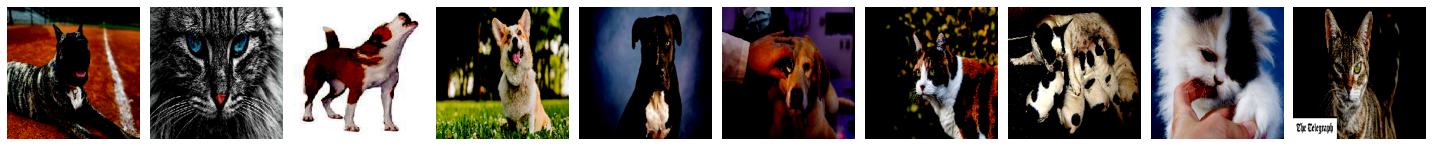

In [6]:
plotImages(imgs)

In [7]:
np.array(labels)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model using the data generators
history = model.fit(
    train_batches,
    steps_per_epoch=train_batches.samples // train_batches.batch_size,
    epochs=5,
    validation_data=test_batches,
    validation_steps=test_batches.samples // test_batches.batch_size,
    verbose=2
)


Epoch 1/5
55/55 - 29s - loss: 0.7996 - accuracy: 0.5265 - val_loss: 0.7783 - val_accuracy: 0.5214 - 29s/epoch - 518ms/step
Epoch 2/5
55/55 - 32s - loss: 0.6014 - accuracy: 0.6819 - val_loss: 0.6962 - val_accuracy: 0.6286 - 32s/epoch - 576ms/step
Epoch 3/5
55/55 - 32s - loss: 0.5150 - accuracy: 0.7550 - val_loss: 0.6898 - val_accuracy: 0.6643 - 32s/epoch - 580ms/step
Epoch 4/5
55/55 - 32s - loss: 0.4245 - accuracy: 0.8519 - val_loss: 0.6948 - val_accuracy: 0.6000 - 32s/epoch - 582ms/step
Epoch 5/5
55/55 - 32s - loss: 0.3555 - accuracy: 0.8830 - val_loss: 0.7093 - val_accuracy: 0.5643 - 32s/epoch - 579ms/step


In [13]:
prediction= model.predict(test_batches, verbose=0)
prediction[0]

array([0.30456725, 0.6954327 ], dtype=float32)

In [18]:
class_labels = ['cats', 'dogs']

# Get the predicted class index
predicted_class_index = np.argmax(prediction[0])
# Get the class label
predicted_class_label = class_labels[predicted_class_index]

print(f"The model predicts that the image is a: {predicted_class_label}")


The model predicts that the image is a: dogs


In [19]:
# Assuming class labels are ['cats', 'dogs']
class_labels = ['cats', 'dogs']

# Get the predicted class indices
predicted_class_indices = np.argmax(prediction, axis=1)

# Map indices to class labels
predicted_class_labels = [class_labels[index] for index in predicted_class_indices]

print(predicted_class_labels)


['dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs',

In [14]:
model.save("cats_dogs_classifier.h5")